<a href="https://colab.research.google.com/github/scheck-bu/BlueSky-Sentiment-Analysis/blob/main/BlueSky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from atproto import Client
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob

In [ ]:
client = Client()
client.login('garths.bsky.social', 'J42S!gPN.jxSgED')

ProfileViewDetailed(did='did:plc:7rixtx5mbj3l2kwhscfqkyby', handle='garths.bsky.social', associated=ProfileAssociated(chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:7rixtx5mbj3l2kwhscfqkyby/bafkreicx5cm6tgcrhdd5iypkmg6dp6cqep5ras5i5q5l3mxw6gp4qskqzu@jpeg', banner=None, created_at='2024-11-15T17:35:46.362Z', description=None, display_name='', followers_count=0, follows_count=1, indexed_at='2024-11-15T17:35:46.362Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=0, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewDetailed')

In [ ]:
def GetFeedPosts(url):
    try:
        url = url.replace("'", "")

        addr_arr = str(url).split('=')
        addr = addr_arr[1]

        res = client.get_post_thread(uri=addr)
        thread = res.thread
        GetThreadPosts(thread)

    except:
        a=''
        #print()

In [ ]:

data = ''
nltk.downloader.download('vader_lexicon')
x = 0
model = SentimentIntensityAnalyzer()
df = pd.DataFrame(columns=['date','score'])
df2 = pd.DataFrame(columns=['date','score'])

scores = []
datetime_object = ''

polarities = []
polarities2 = []
dates = []

has_date= False
def GetThreadPosts(thread):
    for post in thread:
        elements = str(post).split(',')
        for element in elements:
            if "created_at=" in element and not "Record" in element:
                elements2 = str(element).split('=')
                dt = elements2[1]
                dt = dt.replace("T", " ")
                dt = dt.replace("Z", " ")
                dt = dt.replace("'", "")
                dt = dt.split('.')[0]
                print(dt)
                datetime_object = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
                #dates.append(datetime_object)
                hasDate = True
                val =int(datetime_object.timestamp())

            elif "text=" in element and not "py_type=" in element:
                elements3 = str(element).split('=')
                #data = data + elements3[1]
                print(elements3[1])
                wiki = TextBlob(elements3[1])
                dates.append(datetime_object)
                polarities2.append(wiki.sentiment.polarity)

                val = model.polarity_scores(elements3[1])
                val = val['compound']

                polarities.append(val)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data = client.get_timeline(cursor='', limit=100)
feed = data.feed

#print(feed)

next_page = data.cursor

elements = str(feed).split(',')
for element in elements:
    if "uri=" in element:
        # print(element, end="\n")
        # print()
        if "at:" in element:
            GetFeedPosts(element)


Streaming output truncated to the last 5000 lines.
2024-11-13 16:51:14
'I haven’t seen a ad or bot yet \U0001faf6🏽\U0001faf6🏽'
2024-09-07 23:17:42
'It will continue to be a smooth ride to success for Bluesky.'
2024-11-13 21:28:51
'U fast asf'
2024-11-13 18:27:02
''
2024-02-17 03:13:06
'twitter is nowhere to be seen\nawesome!!'
2024-02-17 03:13:06
'BASED'
2024-11-12 23:00:27
'On social networking is #1 in UK'
2023-07-03 05:01:19
"let's go besties! let's drown X"
2024-11-12 00:35:07
'We are so here'
2024-11-10 19:14:14
'Going up hehe'
2024-11-27 19:14:42
'We need blue sky world wide'
2024-11-12 00:34:20
'End that musty'
2024-11-10 07:30:20
"That's hot"
2024-11-14 01:42:31
'App icon so pretty no wonder its a hit🦋🦋🦋'
2024-11-12 16:36:34
'One of us! one of us! Yes
2024-02-17 03:13:06
"Yeah
2024-09-03 22:59:07
'The queen of skeeting alison delery did that'
2024-10-09 18:56:48
'interesting'
2023-10-18 23:41:45
'X is below MS Authenticator. The masses fleeing the stench of x'
2023-04-15 16:54:

In [ ]:
len(dates)

130267

In [ ]:
len(polarities2)

130267

In [ ]:
df = pd.DataFrame(columns=['labels'])
df = pd.DataFrame(columns=['scores'])

df2 = pd.DataFrame(columns=['dates'])
df2 = pd.DataFrame(columns=['scores'])

normalized_array = polarities

df['labels'] = normalized_array
df['scores'] = polarities2

df2['dates'] = dates
df2['scores'] = polarities2

df2 = df2.sort_values(by='dates')


In [ ]:
df

,date,score


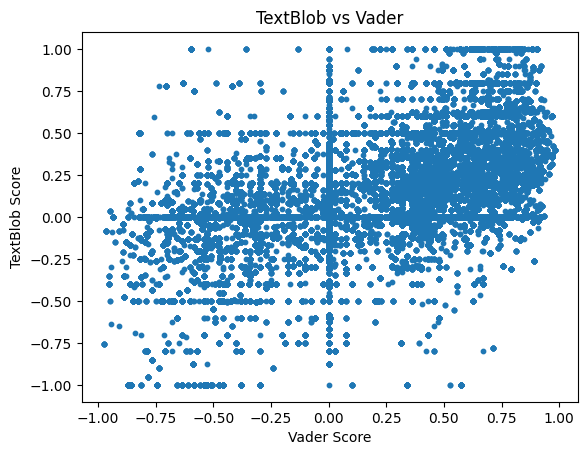

In [ ]:
plt.scatter(df['labels'], df['scores'], s = 10)
plt.xlabel('Vader Score')
plt.ylabel('TextBlob Score')
plt.title('TextBlob vs Vader')
plt.show()

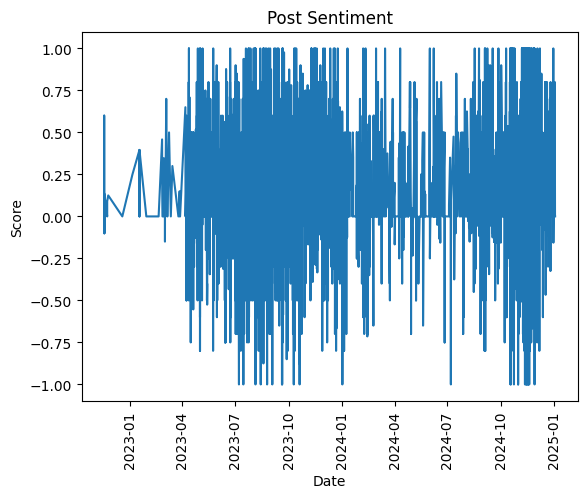

In [ ]:
plt.plot(df2['dates'], df2['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Post Sentiment')
plt.xticks(rotation=90)

# Show the plot
plt.show()

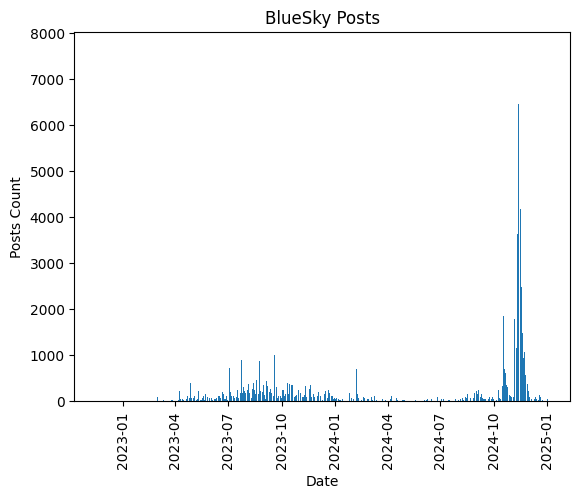

In [ ]:
df2.set_index('dates', inplace=True)

# Count occurrences per day
daily_counts = df2.resample('D').count()

plt.bar(daily_counts.index, daily_counts['scores'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Posts Count')
plt.title('BlueSky Posts')
plt.xticks(rotation=90)

# Show the plot
plt.show()

{'neg': 0.009, 'neu': 0.936, 'pos': 0.055, 'compound': 1.0}


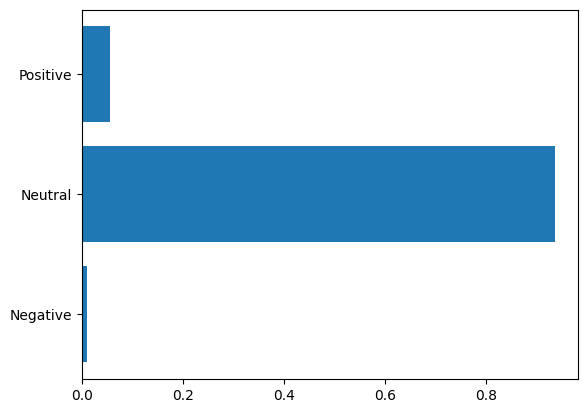

In [ ]:
import numpy as np
model = SentimentIntensityAnalyzer()

scores = model.polarity_scores(str(feed))
#print(scores['neg'])
print(scores)

x = np.array(["Negative", "Neutral", "Positive"])
y = np.array([scores['neg'], scores['neu'], scores['pos']])

plt.barh(x,y)
plt.show()